In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class NormalEquationLogisticRegression:

    def fit(self, x, y):
        xT = np.transpose(x)
        m = x.shape[0]
        self.theta = np.transpose(np.linalg.inv(xT @ x) @ (xT @ y))
        self.score = np.sum((self.theta @ np.transpose(x) - np.transpose(y))**2) / (2 * m)

    def predict(self, x):
        return self.theta @ np.transpose(x)

    def get_score(self):
        return self.score
    
    def get_theta(self):
        return self.theta

In [ ]:
class GradientDescentLogisticRegression:

    def gradient_descent(self, x, y, theta, lr, cnt_it):
        m = x.shape[0]
        for it in range(cnt_it):
            hyp = np.dot(x, theta)
            loss = hyp - y
            xT = np.transpose(x)
            gradient = np.dot(xT, loss) / m
            theta = theta - lr * gradient
        return theta

    def fit(self, x, y):
        m, n = x.shape
        theta = np.random.rand(n, 1)
        self.theta = np.transpose(self.gradient_descent(x, y, theta, 0.01, 10000))
        self.score = np.sum((self.theta @ np.transpose(x) - np.transpose(y))**2) / (2 * m)

    def predict(self, x):
        return self.theta @ np.transpose(x)

    def get_score(self):
        return self.score 

    def get_theta(self):
        return self.theta

In [ ]:
def data_split(df, test_size):
    x, y = df.iloc[ : , : -1 ], df.iloc[ : , [-1] ]

    #x = (x - x.mean()) / x.std()
    # y = (y - y.mean()) / y.std()

    x, y = x.to_numpy(), y.to_numpy()

    x = np.c_[np.ones(x.shape[0]), x]

    x_train, x_test = x[ : -test_size , : ], x[ -test_size : , : ]
    y_train, y_test = y[ : -test_size , : ], y[ -test_size : , : ]

    return [x_train, y_train, x_test, y_test]

In [ ]:
def NormalEquationModel(df, test_size):
    x_train, y_train, x_test, y_test = data_split(df, test_size)

    NELR = NormalEquationLogisticRegression()
    NELR.fit(x_train, y_train)

    y_pred = NELR.predict(x_test)
    score = NELR.get_score()
    theta= NELR.get_theta()

    print('y_pred =', y_pred)
    print('y_test =', y_test)
    print('score =', score)
    print('theta =', theta)

In [ ]:
def GradientDescentModel(df, test_size):
    x_train, y_train, x_test, y_test = data_split(df, test_size)

    GDLR = GradientDescentLogisticRegression()
    GDLR.fit(x_train, y_train)

    y_pred = GDLR.predict(x_test)
    score = GDLR.get_score()
    theta = GDLR.get_theta()

    print('y_pred =', y_pred)
    print('y_test =', y_test)
    print('score =', score)
    print('theta =', theta)

Test DataFrame

In [ ]:
df = pd.DataFrame   (np.array([[2104, 5, 1, 45, 10594],
                               [1416, 3, 2, 40, 10425],
                               [1536, 3, 2, 30, 10475],
                               [2348, 2, 2, 35, 10663],
                               [2000, 3, 1, 45, 10558],
                               [1500, 4, 2, 40, 10451],
                               [3400, 7, 3, 20, 10984]]),
        columns = ['size', 'number of bedrooms', 'number of floors', 'age', 'price'])

In [ ]:
print("Normal Equation solution")
NormalEquationModel(df, 1)
print("Gradient Descent solution")
GradientDescentModel(df, 1)

Normal Equation solution
y_pred = [[10984.]]
y_test = [[10984]]
score = 8.23441756184288e-20
theta = [[ 1.013e+04  2.500e-01  5.000e+00  3.000e+00 -2.000e+00]]
Gradient Descent solution
y_pred = [[nan]]
y_test = [[10984]]
score = nan
theta = [[nan nan nan nan nan]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in subtract
  # Remove the CWD from sys.path while we load stuff.


Homework DataFrame

In [ ]:
df = pd.read_csv('HW_Week2-LinearRegression_data.csv', index_col=[0])
print(df)
df.plot.scatter(x="population", y="profit");
plt.show()

FileNotFoundError: ignored

In [ ]:
print("Normal Equation solution")
NormalEquationModel(df, 10)
print("Gradient Descent solution")
GradientDescentModel(df, 10)


Normal Equation solution
y_pred = [[ 3.41096238  2.83478004  2.28324337  3.05886425  5.3665846   3.25387613
   2.57755578  6.1523748  12.25469138  2.73488132]]
y_test = [[0.92695]
 [0.152  ]
 [2.8214 ]
 [1.8451 ]
 [4.2959 ]
 [7.2029 ]
 [1.9869 ]
 [0.14454]
 [9.0551 ]
 [0.61705]]
score = 4.527552359862948
theta = [[-3.76978185  1.19639191]]
Gradient Descent solution
y_pred = [[ 3.4109624   2.83478006  2.28324339  3.05886427  5.36658461  3.25387615
   2.5775558   6.15237481 12.25469136  2.73488134]]
y_test = [[0.92695]
 [0.152  ]
 [2.8214 ]
 [1.8451 ]
 [4.2959 ]
 [7.2029 ]
 [1.9869 ]
 [0.14454]
 [9.0551 ]
 [0.61705]]
score = 4.527552359862949
theta = [[-3.76978181  1.1963919 ]]


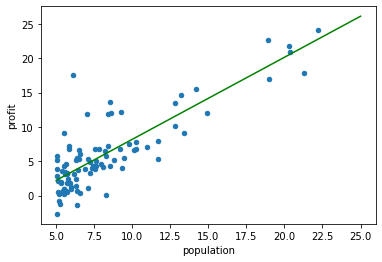

In [ ]:
theta = [-3.76978185 , 1.19639191]
x = np.linspace(5,25,1000)
theta = [-3.76978185 ,  1.19639191]
y = theta[0] + x * theta[1]
df.plot.scatter(x="population", y="profit");
plt.plot(x, y, 'g')